In [83]:
import nltk

In [84]:
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to /home/s/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [85]:
from nltk.corpus import cmudict 

In [86]:
d = cmudict.dict()

In [87]:
def nsyl(word): 
  # count the number of syllables in a word
  return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]

In [88]:
nsyl('legendary')

4

In [104]:
with open('content/poem', 'r') as poemfile:
  poemraw = poemfile.readlines()
  poem = []
  for i in poemraw:
    poem.append( i.strip())

In [94]:
def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [114]:
# sum the number of syllables in each line
def label_poem(poem):
  poem_syl = []
  for sentence in poem:
    line_syl = 0
    for word in sentence.split():
    
      # remove punctuation from word
      word = word.strip(".,!?;:'\"")
      try: line_syl+= nsyl(word)
      except: line_syl += syllable_count(word)
    poem_syl.append((line_syl, sentence))
  return poem_syl

In [115]:
a= label_poem(poem)

poem


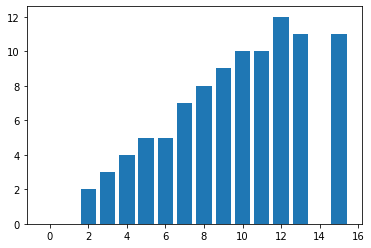

babablacksheep


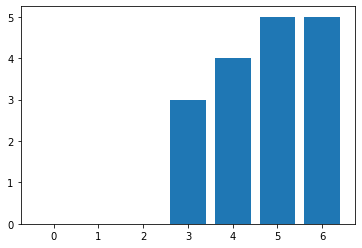

jackharlow


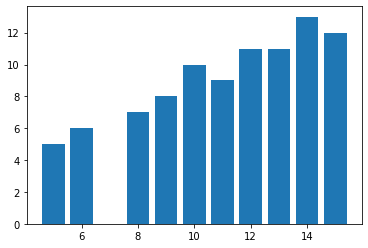

abrookinthecity_robertfrost


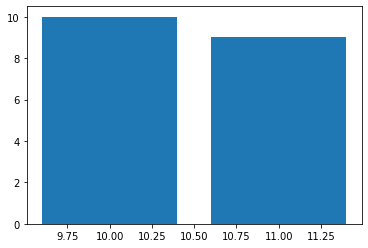

dylanthomas


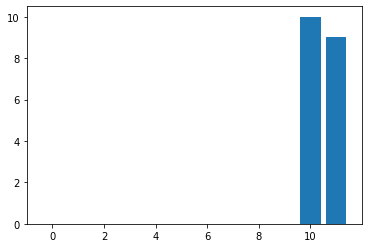

tswift


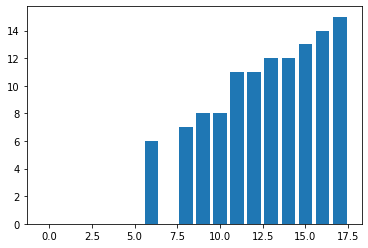

kanye


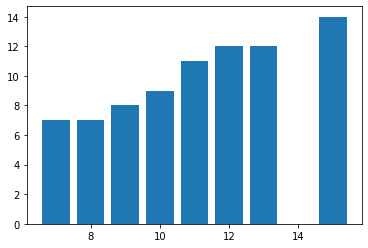

In [153]:
# for every file in the content folder extract the lines, and run the label_poem function
# for each file,  plot a bar chart  the result



import os
import matplotlib.pyplot as plt



files = os.listdir('content')
for file in files:
    with open('content/'+file, 'r') as poemfile:
        poemraw = poemfile.readlines()
        poem = []
        for i in poemraw:
            poem.append( i.strip())
    print(file)
    a= label_poem(poem)
    plt.bar([i[0] for i in a], [len(i[1].split()) for i in a])
    plt.show()

In [151]:
'''
bigger blocks reflect better structure(structure is the relationship between no of words per line and no of syllables per line) "better" structure is seen in poems and music tends to not follow this structure
'''

'\n\n'

In [ ]:
'''
interesting qustions this raises:
1. is baba black sheep more of a poem or more of a song?
2. does a rhythm matter?
3. 
'''